The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [77]:
# importing necessary packages

import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [8]:
turbine_data= pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment17_NeuralNetworks/gas_turbines.csv')

In [10]:
# make a copy
df= turbine_data.copy()
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [13]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [14]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

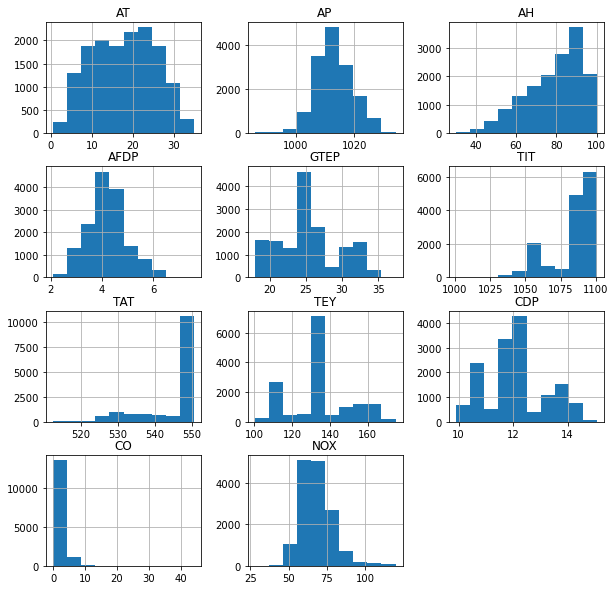

In [16]:
df.hist(figsize= (10,10))
plt.show()

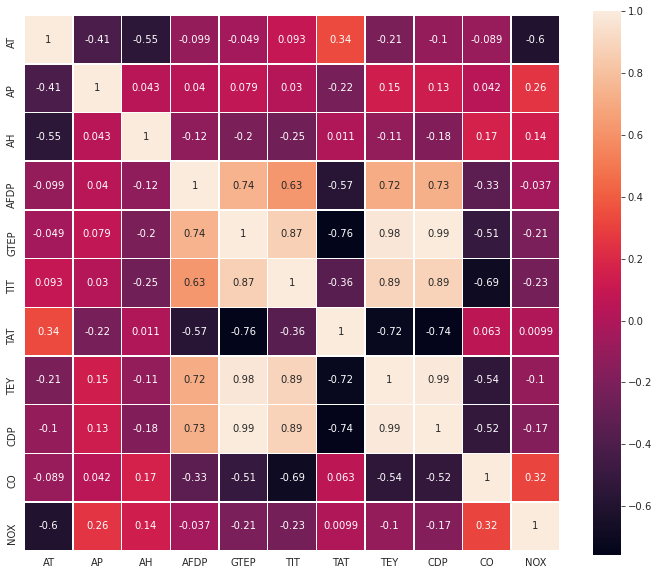

In [34]:
c= df.corr()
#mask = np.zeros_like(c)
#mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(c, vmax=1, square=True, linewidths=.5, annot= True)

In [36]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [69]:
x= df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
print(x)
y= df['TEY']
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

In [68]:
# Standerdize the independant variables
x_standerdized= (x-x.mean())/x.std()

#### Hyperparameter Tuning

In [70]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [78]:
# create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=50, epochs=10...................................
[CV 1/5; 1/18] END .batch_size=50, epochs=10;, score=-135.174 total time=   1.8s
[CV 2/5; 1/18] START batch_size=50, epochs=10...................................
[CV 2/5; 1/18] END ..batch_size=50, epochs=10;, score=-54.689 total time=   1.6s
[CV 3/5; 1/18] START batch_size=50, epochs=10...................................
[CV 3/5; 1/18] END ..batch_size=50, epochs=10;, score=-46.542 total time=   1.6s
[CV 4/5; 1/18] START batch_size=50, epochs=10...................................
[CV 4/5; 1/18] END ..batch_size=50, epochs=10;, score=-57.717 total time=   1.9s
[CV 5/5; 1/18] START batch_size=50, epochs=10...................................
[CV 5/5; 1/18] END ..batch_size=50, epochs=10;, score=-55.813 total time=   1.6s
[CV 1/5; 2/18] START batch_size=50, epochs=50...................................
[CV 1/5; 2/18] END ...batch_size=50, epochs=50;,

In [80]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6811059176921844, using {'dropout_rate': 0, 'learning_rate': 0.001}
-0.6811059176921844,0.1764712103557417 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-1.148830872774124,0.9508097830344581 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-2.3020855367183684,1.8346887314346971 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-1.0944195151329041,0.3646237099464651 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-227.83968048095704,99.50065634794099 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-16.090184497833253,7.616321286311543 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-10.712379837036133,10.038221335254802 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-21.95007743835449,22.12591833917103 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-21.09161796569824,10.412455396503686 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-198.17035522460938,44.44309556848461 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-35.13497428894043,8.38467087399779 with: {'d

In [81]:
from tensorflow.keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
# Define grid search model
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]
# Make a dictionary of grid search parameters
param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.775 total time=  12.9s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-13996.442 total time=   6.3s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.672 total time=   6.2s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.420 total time=  13.6s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-1.068 total time=   7.1s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 

In [82]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-1.0210727214813233, using {'dropout_rate': 0, 'learning_rate': 0.01}
-2799.875348728895,5598.283520900254 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-1.0210727214813233,0.4921370518602792 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-1.2966068029403686,0.466335915859504 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-1.8474257588386536,0.7605675460031153 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-180.57075414657592,147.57306464020596 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-12.958211326599121,4.015385768065851 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-206.7453399181366,402.3972495192242 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-19.487633800506593,11.664068401368892 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-50.68983688354492,17.580895104504453 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-175.02142333984375,69.35468861389303 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-55.94377555847168,42.64806588401649 with: {'dr

### Tuning Hyperparameters: Activation Function and Kernal intitilizer

In [83]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
# Define grid search model
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']
# Make a dictionary of grid search parameters
param_grid= dict(activation_function= activation_function, init=init)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................
[CV 1/5; 1/6] END activation_function=linear, init=uniform;, score=-1.090 total time=   6.7s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END activation_function=linear, init=uniform;, score=-0.501 total time=   6.7s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END activation_function=linear, init=uniform;, score=-0.635 total time=   7.4s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END activation_function=linear, init=uniform;, score=-0.859 total time=   6.9s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END activation_function=linear, init=uniform;, score=-0.587 total time=   8.8s
[CV 1/5; 2/6] START activation_function=linear, init=normal...........

In [84]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-0.6119681000709534, using {'activation_function': 'linear', 'init': 'normal'}
-0.7344402313232422,0.21372012998614945 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.6119681000709534,0.10273113934123804 with: {'activation_function': 'linear', 'init': 'normal'}
-15175.9501953125,820.9213391030445 with: {'activation_function': 'linear', 'init': 'zero'}
-0.6430998146533966,0.12547306257212681 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.7317873477935791,0.1546906961455772 with: {'activation_function': 'relu', 'init': 'normal'}
-15175.9462890625,820.9249121536639 with: {'activation_function': 'relu', 'init': 'zero'}


### Tuning Parameter: Number of Neurons in Activation Layer

In [85]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
# Define grid search model
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
# Make a dictionary of grid search parameters
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x_standerdized,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 1/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.715 total time=   6.3s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.500 total time=   6.3s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.813 total time=  14.2s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.440 total time=   6.4s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.591 total time=   6.3s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END neuron1=

In [86]:

# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))


Best:-0.6118821740150452, using {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.6118821740150452,0.13661133559086389 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.675917899608612,0.0969412644496209 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-0.6444161057472229,0.19248810274954534 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-0.7063214242458343,0.23011292387575707 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-0.6339696764945983,0.08525427128684404 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-0.7082401037216186,0.1919835477228706 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-0.6453491508960724,0.13748196575394692 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-0.7059624493122101,0.21287148679926854 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-0.6574430048465729,0.1931843585071802 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-0.6164584338665009,0.16903038600567102 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-0.6303770184516907,0.17934939012

## Model - Using Optimum Hyperparameters

### Tuning parameter: Number of neurons in activation layer

In [87]:
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=100)
# Fitting model
estimator= model.fit(x_standerdized,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, x_standerdized,y, cv= kfold)
print('mse:', results.mean())

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [88]:
print('MSE',results.mean())

MSE -0.588516753911972
